<a href="https://colab.research.google.com/github/saadkiet/RNN---LSTM-for-IMDB-Review-Classification/blob/master/RNN_LSTM_for_IMDB_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Installation and Setup

In [1]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 37.8MB/s 
     |████████████████████████████████| 3.9MB 42.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=85856e70721e2b6ecf183e3678725e43d6e34761be42c9d4bee8c4461faa5fe3
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0


In [0]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Step 2 : Data Pre Processing

In [0]:
# importing the libraries
from tensorflow.keras.datasets import imdb #dataset
from tensorflow.keras.preprocessing.sequence import pad_sequences #importing this class for data pre processing.

In [6]:
#loading dataset
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=20000)
#Num_word are most frequently repeated words

17465344/17464789 [==============================] - 0s 0us/step


In [7]:
x_train
#These reviews are encoded in numbers.
#These are bag of words. Bag of words are encoded in NUmbers.
#These reivews are not of fixed length, we will make them of fixed length

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

These reivews are not of fixed length, we will make them of fixed length. To do that, we apply padding.

In [0]:
x_train=pad_sequences(x_train,maxlen=100)
x_test=pad_sequences(x_test,maxlen=100)

After Padding all reviews will be of same length. If a review length is less than 100 then 0's will be added. And if review length is more than 100, then it will be Truncate.

In [10]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

#Step 3 : Building The Model

In [0]:
#Define and Object (Initiallizing RNN)
model = tf.keras.models.Sequential()


In [0]:
#Adding Embedding layer.
model.add(tf.keras.layers.Embedding(input_dim=20000,output_dim=128,input_shape=(100,)))
#Embeded layer can only be used as 1st layer in the model.

#input_dim= No of unique words. Which are 20000 above.

we use embeded layer to compress feature space into smaller one because it is memory intensive task.

In [0]:
#Adding LSTM layer
model.add(tf.keras.layers.LSTM(units=128,activation='tanh',))

#units means no of cells here.

LSTM layer will be used to understand relationship between different elements of a sequence.

In our case LSTM will be used to understand relation in different words in reviews

In [0]:
#Output layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

#Here we only need binary output hence units=1

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compiling the Model
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

#Optimizer = rmsprop because it works better for sequences instead of adam

#Step 4 : Traning the model.


In [20]:
history=model.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 105s 4ms/sample - loss: 0.4530 - accuracy: 0.7894 - val_loss: 0.6621 - val_accuracy: 0.7776
Epoch 2/5
25000/25000 [==============================] - 104s 4ms/sample - loss: 0.2833 - accuracy: 0.8870 - val_loss: 0.3370 - val_accuracy: 0.8565
Epoch 3/5
25000/25000 [==============================] - 104s 4ms/sample - loss: 0.2270 - accuracy: 0.9141 - val_loss: 0.4161 - val_accuracy: 0.8058
Epoch 4/5
25000/25000 [==============================] - 104s 4ms/sample - loss: 0.1874 - accuracy: 0.9303 - val_loss: 0.3711 - val_accuracy: 0.8470
Epoch 5/5
25000/25000 [==============================] - 104s 4ms/sample - loss: 0.1545 - accuracy: 0.9451 - val_loss: 0.4819 - val_accuracy: 0.8198


In [0]:
y_pred=model.predict_classes(x_test)

In [22]:
print(y_pred[15],y_test[15])
# 0 means movie has negative review
#1 means movie has good review

[0] 0


In [23]:
print(y_pred[15],y_test[15])

[0] 0


In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[ 9023  1027]
 [ 3477 11473]]


In [25]:
acc_s=accuracy_score(y_pred,y_test)
print(acc_s)

0.81984


In [0]:
#Learning Curve
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

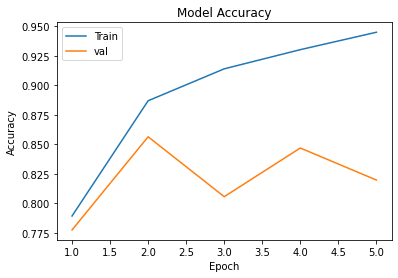

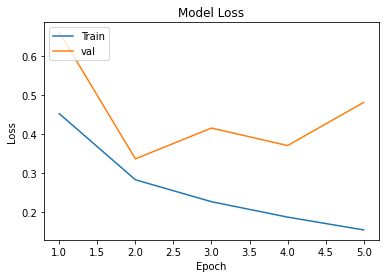

In [27]:
learning_curve(history,5)

Training Accuracy is more than Validation accuracy, that means the model has learned too much from traning data. Its overfitting.

Model validationn accuracy is 81%, which is pretty good.